In [1]:
#################################################################################
####   DIMENSION REDUCTION PCA - Identify more important Variables
##################################################################################
#-- Liberate memory
import gc
gc.collect()

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error

#-------- Read the master file
df = pd.read_csv(r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\All_Countries.csv")
NumVar = 12

#-------- Delete Zero emisions Energies. 

ToDelete = df.loc[(df["Energy"] == "electric") ]
df = df.drop(ToDelete.index)   
ToDelete = df.loc[(df["Energy"] == "hydrogen") ]
df = df.drop(ToDelete.index)

#------------------------------------------------------------------------------------
df = df.drop("Em_on_target",axis=1)
df = df.drop("CO2_Qtls", axis=1)
#------------------------------------------------------------------------------------

df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric = df_numeric.drop("CO2_wltp", axis=1)

scaler = StandardScaler()
dfCorr = pd.DataFrame(scaler.fit_transform(df_numeric)).corr()
dfCorr.columns = df_numeric.columns

dfCorr = dfCorr.replace([np.inf, -np.inf, np.nan], 0.0)

C:\Users\mied1\AppData\Local\Temp\ipykernel_8132\3920931481.py:20: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\All_Countries.csv")


,Variable,Importance
0,Fuel consumption,0.228836
1,Electric range (km),0.227608
2,Engine_cm3,0.221594
3,Power_KW,0.217340
4,El_Consumpt_whkm,0.213748
5,Axle_width_other_mm,0.212076
6,year,0.201420
7,Eco-innovation program,0.199534
8,Wheelbase_mm,0.198825
9,Axle_width_steer_mm,0.195460


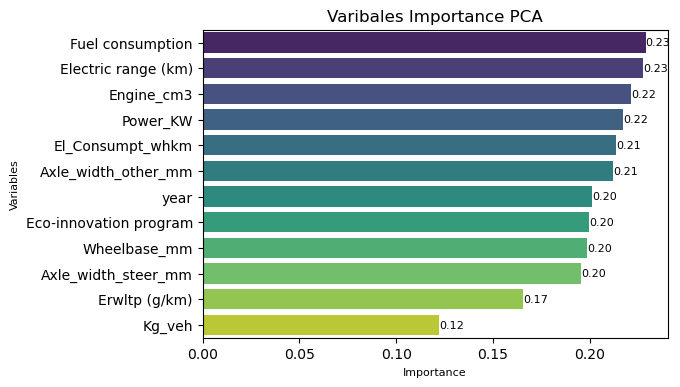

In [2]:
# --- calculate the eigenvalues and eigenvectors of a correlation matrix.
   
eigenvalues, eigenvectors = np.linalg.eig(dfCorr)
sorted_indices = np.argsort(eigenvalues)[::-1]

# --- selects the top "NumVar" eigenvalues and corresponding eigenvectors. 

selected_eigenvalues = eigenvalues[sorted_indices[:NumVar]]
selected_eigenvectors = eigenvectors[:, sorted_indices[:NumVar]]
projected_data = np.dot(dfCorr, eigenvectors[:, sorted_indices[:NumVar]])

# --- calculates the importance of the variables based on the selected eigenvectors.
variable_importance = np.abs(selected_eigenvectors).mean(axis=1)
# ---  sorts the variables based on their importance.
sorted_variables = np.argsort(variable_importance)[::-1]

top_variables = sorted_variables[:NumVar]

for i in top_variables:
    importance_df = pd.DataFrame({'Variable': df_numeric.columns[top_variables], 'Importance': variable_importance[top_variables]})
    importance_df = importance_df.sort_values('Importance', ascending=False)
   
display(importance_df.head(12))  

# ------  Store Importance variables in a  CVS file to relaunch ridge model with this info. 
importance_df.to_csv('ReductionsRidge.csv', index=False)


# ------   Plot the  result 
fig, ax = plt.subplots(figsize=(6, 4)) # Ajustar el tamaño del gráfico
sns.barplot(x='Importance', y='Variable', data=importance_df, ax=ax, palette='viridis') 
plt.xlabel('Importance', fontsize=8)
plt.ylabel('Variables', fontsize=8) 
plt.title('Varibales Importance PCA', fontsize=12) 

for i, (value, variable) in enumerate(zip(importance_df['Importance'], importance_df['Variable'])):
    ax.annotate(f'{value:.2f}', xy=(value, i), ha='left', va='center', fontsize=8) 

import winsound
winsound.PlaySound("C:\\Users\\mied1\\00 - Herramientas Python\\mixkit-intro-transition-1146.wav", winsound.SND_FILENAME)
